# Introduction to the NASA SnowEx Snow Albedo 2023 Dataset
# author: Anton Surunis
# date: 2024-09-10

![Field spectrometer measurements in the SnowEx 2023 Snow Albedo Campaign](./images_for_notebook/field_specs.png)

# The NASA SnowEx 2023 Snow Albedo Field Campaign Dataset

The NASA SnowEx 2023 Snow Albedo Field Campaign took place in burned and unburned boreal forests around Fairbanks, Alaska. The goal of the campaign was to improve understanding of the spatial, temporal, and process-based variability of snow albedo and the uncertainty of snow albedo measurements across scales in boreal forests. The campaign objectives were to capture snow albedo across scales of snow accumulation and snowmelt with coincident snow albedo from ground-based spectrometer measurements, tower-mounted and drone-based radiation measurements, and airborne AVIRIS-NG overflights across boreal forest disturbance history.

Over five weeks from April 1st to May 5th 2023, several teams visited field sites around Fairbanks and collected spectral measurements over 500m-1km transects capturing snow reflectance and snow albedo over gradients of landscape, topography, and forest disturbance variability. During days with favorable weather/clear sky conditions, teams walked transects in teams of three collecting observations of snow spectra using field spectrometers coincident with hyperspectral aerial and satellite observations from above.

The purpose of this tutorial is to provide an introduction to accessing and using the resulting field dataset. First, a review of background information is provided. Then, we cover how to prepare and access the different data points provided in the dataset. Finally, we provide an example of how to calculate derived statistics from the dataset.

# Review of Hyperspectral Data

Incoming solar radiation is either reflected, absorbed, or transmitted (or a combination of all three) depending on the surface material. This spectral response allows us to identify varying surface types (e.g. vegetation, snow, water, etc.) in a remote sensing image. The spectral resolution, or the wavelength interval, determines the amount of detail recorded in the spectral response: finer spectral resolutions have bands with narrow wavelength intervals, while coarser spectral resolutions have bands with larger wavelength intervals, and therefore, less detail in the spectral response (Credit: "Introduction to AVIRS-NG",  Joachim Meyer, Chelsea Ackroyd, McKenzie Skiles, Phil Dennison, Keely Roth). ![https://www.neonscience.org/resources/learning-hub/tutorials/hyper-spec-intro](./images_for_notebook/em_spectrum.png)

# Surface Reflectance vs Albedo

Hyperspectral data is often captured as either albedo or surface reflectance.

Albedo is the proportion of solar radiation that is reflected by a surface integrated over all incoming solar angles. This is accomplished by taking the ratio of down- and up-facing measurements of hemispherical radiation using a wide (180 degree) lens called a remote cosine receptor (RCR). Albedo is a very important property in calculating land surface energy exchange and snow-mass energy balance.

![<https://www.scielo.br/j/rbg/a/98BNzSBYtyyw8YLPxVM9KTL/?lang=en>](./images_for_notebook/albedo_measure.png)

 In contrast, surface reflectance is the proportion of solar radiation reflected over a single or very narrow incoming solar angle (usually 4-8 degrees). Surface reflectance is calculated by taking the ratio of reflected solar radiation from a surface relative and that of a white reference.

![<https://www.mps.mpg.de/planetary-science/moon-surface>](./images_for_notebook/refl_measure.png)

White references are usually small panels covered in Spectralon - a highly reflective, near-Lambertian substance that reflects and scatters nearly all incoming light equally in all directions.

![<https://www.labsphere.com/product/spectralon-reflectance-targets/>](./images_for_notebook/spectralon.jpg)

Surface reflectance allows us to identify varying surface types (e.g. vegetation, snow, water, etc.) as well as specific qualities of those surfaces (e.g., grain size or grain type in a snowpack). While similar measures, the surface reflectance and albedo of a surface can differ considerably, especially at low solar angles where the angle of direct incident light is far off nadir. Further, since snow reflectance is based on reflected light from a white reference, it is essential that the white reference is kept pristine for accurate measurement of surface reflectance.

# Field Spectrometers

![More field spectrometer measurements in the SnowEx 2023 Snow Albedo Campaign](./images_for_notebook/field_specs2.png)

Field spectrometers are remote sensing instruments that are carried into the field by operators and used to measure surface reflectance and albedo. Field spectrometers are manufactured by many different companies and come in many more different models using different spectral ranges, attachments, and processing software. While it is difficult to account for these differences without instrument intercomparison studies, it is an important fact to keep in mind when comparing hyperspectral data from different spectrometers.


## Data Loading and Description

In [37]:
# Load python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import folium

In [38]:
# INSERT YOUR PATH HERE
path = '/Users/brent/Code/AVIRIS/field_albedo/NASA_THP2020_spec_all_v1_20240906_nsidc.csv'


In [39]:
# Read dataframe
df = pd.read_csv(path)
df

/var/folders/wv/8sspfkpj0zz8cjf_9l8x34k00000gn/T/ipykernel_1156/724302279.py:2: DtypeWarning: Columns (7,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,id,date,instrument,site,transect,type,attachment,orientation,lat,long,...,depth,depth_alt,depth_acc,elevation,slope,aspect,tags,rcr_group,wavelength,value
0,20230407_S2_CARI_T2_10,2023-04-07,S2,CARI,T2,ssr,8deg,down,65.157432,-147.501666,...,86.0,266.26000,0.260000,258.314789,10.524395,129.196701,#white reference,-9999,350,1.161611
1,20230407_S2_CARI_T2_10,2023-04-07,S2,CARI,T2,ssr,8deg,down,65.157432,-147.501666,...,86.0,266.26000,0.260000,258.314789,10.524395,129.196701,#white reference,-9999,351,1.161445
2,20230407_S2_CARI_T2_10,2023-04-07,S2,CARI,T2,ssr,8deg,down,65.157432,-147.501666,...,86.0,266.26000,0.260000,258.314789,10.524395,129.196701,#white reference,-9999,352,1.161260
3,20230407_S2_CARI_T2_10,2023-04-07,S2,CARI,T2,ssr,8deg,down,65.157432,-147.501666,...,86.0,266.26000,0.260000,258.314789,10.524395,129.196701,#white reference,-9999,353,1.160960
4,20230407_S2_CARI_T2_10,2023-04-07,S2,CARI,T2,ssr,8deg,down,65.157432,-147.501666,...,86.0,266.26000,0.260000,258.314789,10.524395,129.196701,#white reference,-9999,354,1.160609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564508,20230504_S4_CARI_T3_65,2023-05-04,S4,CARI,T3,albedo_raw,rcr,up,65.154253,-147.482509,...,46.0,227.46114,0.332216,222.124023,3.128354,245.645065,#location estimated,13,2496,0.111864
3564509,20230504_S4_CARI_T3_65,2023-05-04,S4,CARI,T3,albedo_raw,rcr,up,65.154253,-147.482509,...,46.0,227.46114,0.332216,222.124023,3.128354,245.645065,#location estimated,13,2497,0.160377
3564510,20230504_S4_CARI_T3_65,2023-05-04,S4,CARI,T3,albedo_raw,rcr,up,65.154253,-147.482509,...,46.0,227.46114,0.332216,222.124023,3.128354,245.645065,#location estimated,13,2498,0.265144
3564511,20230504_S4_CARI_T3_65,2023-05-04,S4,CARI,T3,albedo_raw,rcr,up,65.154253,-147.482509,...,46.0,227.46114,0.332216,222.124023,3.128354,245.645065,#location estimated,13,2499,0.380519


In [40]:
# Display types
df.dtypes

id              object
date            object
instrument      object
site            object
transect        object
type            object
attachment      object
orientation     object
lat            float64
long           float64
spec_time       object
depth          float64
depth_alt      float64
depth_acc      float64
elevation      float64
slope          float64
aspect         float64
tags            object
rcr_group        int64
wavelength       int64
value          float64
dtype: object

The dataset includes field spectrometer measurements of snow reflectance, snow albedo, and up- and down-facing bihemispherical radiance/irradiance measurements along with lots of associated metadata. The column descriptions are as follows:

* __id__: Unique ID number of measurement  

* __date__: The date of measurement collection


* __instrument__: Code corresponding to the spectrometer identifier (S1 = Spectral Evolution; S2 & S7 = ASD FieldSpec4)
* __site__: Code of study site (CARI = Caribou-Poker Creek; DEJU = Delta Junction, CRMF = Creamer’s Field)
* __transect__: Code corresponding to transect where the measurement was taken (T1 = burned forest; T2 = forested; T3 = open)
* __type__: The type of spectral measurement as recorded by the note taker (ssr = snow surface reflectance, albedo = calculated snow surface albedo, albedo_raw = up and down components of snow surface albedo, irr_raw = irradiance)  attachment: The fiber-optic attachment (8deg = 8 degree optic, 4deg = 4 degree optic, rcr = remote cosine receptor)
* __orientation__: Facing of the fiber-optic attachment (down = down-facing, up = up-facing)
* __lat__: Latitude of measurement as recorded by the GPS unit (epsg:4269)
* __long__: Longitude of measurement as recorded by the GPS unit (epsg:4269)
* __spec_time__: Local date and time of measurement as reported by spectrometer
* __depth__: Snow depth in cm
* __depth_alt__: Altitude as given by the GPS unit
* __depth_acc__: Accuracy of GPS coordinates as recorded by the GPS unit
* __slope__: Slope of the ground surface in degrees calculated from USGS 3DEP DEM (10m spatial resolution) using GIS software
* __aspect__: Aspect of the ground surface in degrees calculated from USGS 3DEP DEM (10m spatial resolution) using GIS software  
* __tags__: Notes taken by notetaker with discrete notes* seperated by “#”
* __rcr_group__: Grouping variable for albedo and irradiance calculations
* __wavelength__: Wavelength measured by spectrometer
* __value__: Value measured by spectrometer at the given wavelength

## Data Preparation
First, we replace -9999 (null) values with NA, set negative values to 0 and convert the date column to the “date” data type.

In [41]:
# Replace -9999 with np.NaN
df = df.replace(-9999, np.nan)

# Set negative values in the 'value' column to 0
df['value'] = df['value'].where(df['value'] >= 0, 0)

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

Finally, we add some grouping variables to our dataset. These variables are fairly abitrary, but, broadly, transect(s) 1 went through burned forests, transect(s) went through unburned forests, and transect(s) 3 went through open areas. The season variable splits the data into three times spans over the field campaign.

In [42]:
# Landcover grouping column
df['landcover'] = np.where(df['site'] == "CRMF", "open",
                           np.where(df['transect'] == "T1", "burn",
                                    np.where(df['transect'] == "T2", "forest", "open")))

# Season grouping column
df['season'] = np.where(df['date'] < pd.to_datetime("2023-04-15"), "early",
                        np.where((df['date'] >= pd.to_datetime("2023-04-15")) & 
                                 (df['date'] < pd.to_datetime("2023-04-21")), "mid", "late"))

# Factor season so that it is in the right order
df['season'] = pd.Categorical(df['season'], categories=["early", "mid", "late"], ordered=True)

## Data Exploration: Measurement Locations
Let’s start exploring the data by mapping our measurement locations.

In [43]:
# Filter and keep distinct rows
pts = df[(df['type'] == 'ssr') | (df['type'] == 'albedo')].drop_duplicates(subset='id')
pts = pts.dropna(subset=['lat', 'long'])  # Remove rows with NaN in lat/lon

# Define color mapping
color_map = {'ssr': 'blue', 'albedo': 'orange'}
pts['color'] = pts['type'].map(color_map)

# Create a folium map centered around the mean location of your points
m = folium.Map()

# Get the lat/lon bounds of the data
bounds = [[pts['lat'].min(), pts['long'].min()], [pts['lat'].max(), pts['long'].max()]]

# Add circle markers
for _, row in pts.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        color=row['color'],
        radius=5,
        popup=row['type']
    ).add_to(m)

# Fit the map to the bounds of the points
m.fit_bounds(bounds)

# Add OpenStreetMap tiles with attribution
folium.TileLayer(
    'OpenStreetMap',
    name='OpenStreetMap',
    attr='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors'
).add_to(m)

# Display the map
m

## Data Exploration: Snow Surface Reflectance
Let’s take a look at just the reflectance data.

First, we filter our data by snow surface reflectance (ssr) measurements only. Some of the measurements have exceptionally high reflectance values, so we filter out measurements where reflectance is too high in the visible range.

For this example, it is looking at __just__ mid-season measurements at the CARI site.

In [44]:
# Only types of snow surface reflectance
df_ssr = df[df['type'] == 'ssr']

# Grouping, filtering, and then removing any that meet this condition
df_ssr = (df_ssr.groupby('id')
             .filter(lambda x: not any((x['wavelength'] < 750) & (x['value'] >= 1.2)))
             .reset_index(drop=True))

In [45]:
# Creating a dataset for now just looking at CARI during mid season
df_ssr_cari = df_ssr[(df_ssr['site'] == 'CARI') & (df_ssr['season'] == 'mid')]

In [46]:
# Here, we are grouping by wavelength and landcover, and taking the mean and standard deviation for each group
df_group = df_ssr_cari[['wavelength','value','landcover']].groupby(['wavelength','landcover']).agg(['mean','std']).reset_index()
df_group

wavelength landcover     value          
                               mean       std
0           350      burn  1.046827  0.062089
1           350    forest  1.011812  0.117072
2           350      open  1.114804  0.070424
3           351      burn  1.045677  0.062203
4           351    forest  1.010088  0.117716
...         ...       ...       ...       ...
6448       2499    forest  0.020890  0.028921
6449       2499      open  0.033186  0.030367
6450       2500      burn  0.208881  0.191107
6451       2500    forest  0.021516  0.034293
6452       2500      open  0.039614  0.038573

[6453 rows x 4 columns]

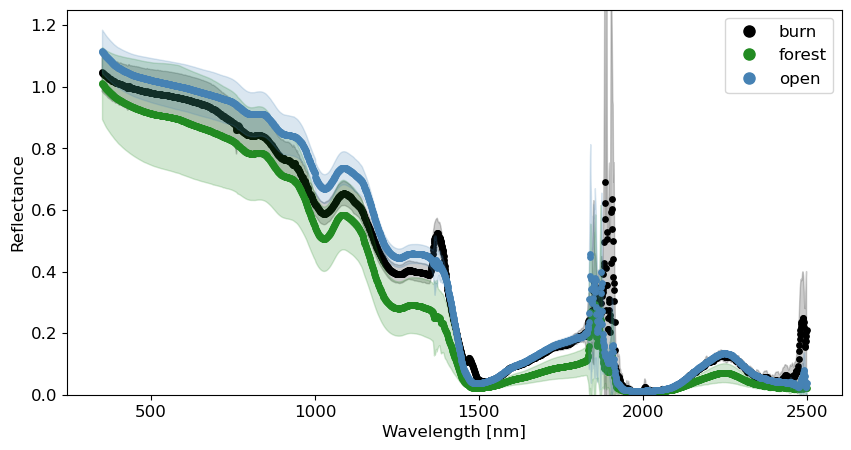

In [47]:
# These can each be plotted now with the following block
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), sharex=True, sharey=True)
plt.rcParams.update({'font.size': 12})

landcovers = ['burn','forest','open']
colors = ['black', 'forestgreen', 'steelblue']
legend_handles = []

for i in range(len(landcovers)):
    df_group_lc = df_group[df_group['landcover'] == landcovers[i]]
    c = colors[i]
    ax.scatter(df_group_lc['wavelength'], df_group_lc['value']['mean'], c=c, s=15, alpha=1.0)
    ax.fill_between(df_group_lc['wavelength'], df_group_lc['value']['mean']-df_group_lc['value']['std'],
                    df_group_lc['value']['mean']+df_group_lc['value']['std'], alpha=0.2, color=c)

    # Create custom legend handle for scatter points
    legend_handles.append(mlines.Line2D([], [], color=c, marker='o', linestyle='None', markersize=8, label=landcovers[i]))


ax.set_ylim(0,1.25)
ax.legend(handles=legend_handles)
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Reflectance')
plt.show()

## Data Exploration: Snow Surface Albedo
We can repeat this same example but now for snow albedo.

Once again, just looking at mid-season CARI collections.

In [48]:
# Remove tags with bad and only include albedo
df_alb = df[(df['type'] == 'albedo') & (df['tags'].isna() | ~df['tags'].str.contains('bad', na=False))]

df_alb

,id,date,instrument,site,transect,type,attachment,orientation,lat,long,...,depth_acc,elevation,slope,aspect,tags,rcr_group,wavelength,value,landcover,season
2280366,20230407_S2_CARI_T2_3,2023-04-07,S2,CARI,T2,albedo,rcr,NaN,65.157432,-147.501666,...,0.260000,258.314789,10.524395,129.196701,NaN,3.0,350,0.809766,forest,early
2280367,20230407_S2_CARI_T2_3,2023-04-07,S2,CARI,T2,albedo,rcr,NaN,65.157432,-147.501666,...,0.260000,258.314789,10.524395,129.196701,NaN,3.0,350,0.809766,forest,early
2280368,20230407_S2_CARI_T2_3,2023-04-07,S2,CARI,T2,albedo,rcr,NaN,65.157432,-147.501666,...,0.260000,258.314789,10.524395,129.196701,NaN,3.0,351,0.810376,forest,early
2280369,20230407_S2_CARI_T2_3,2023-04-07,S2,CARI,T2,albedo,rcr,NaN,65.157432,-147.501666,...,0.260000,258.314789,10.524395,129.196701,NaN,3.0,351,0.810376,forest,early
2280370,20230407_S2_CARI_T2_3,2023-04-07,S2,CARI,T2,albedo,rcr,NaN,65.157432,-147.501666,...,0.260000,258.314789,10.524395,129.196701,NaN,3.0,352,0.811106,forest,early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2714863,20230504_S4_CARI_T3_13,2023-05-04,S4,CARI,T3,albedo,rcr,NaN,65.154253,-147.482509,...,0.332216,222.124023,3.128354,245.645065,#location estimated,13.0,2498,0.000000,open,late
2714864,20230504_S4_CARI_T3_13,2023-05-04,S4,CARI,T3,albedo,rcr,NaN,65.154253,-147.482509,...,0.332216,222.124023,3.128354,245.645065,#snow#location estimated,13.0,2499,0.000000,open,late
2714865,20230504_S4_CARI_T3_13,2023-05-04,S4,CARI,T3,albedo,rcr,NaN,65.154253,-147.482509,...,0.332216,222.124023,3.128354,245.645065,#location estimated,13.0,2499,0.000000,open,late
2714866,20230504_S4_CARI_T3_13,2023-05-04,S4,CARI,T3,albedo,rcr,NaN,65.154253,-147.482509,...,0.332216,222.124023,3.128354,245.645065,#snow#location estimated,13.0,2500,2.101184,open,late


similar to the reflectance example, we will just grab CARI mid-season for now

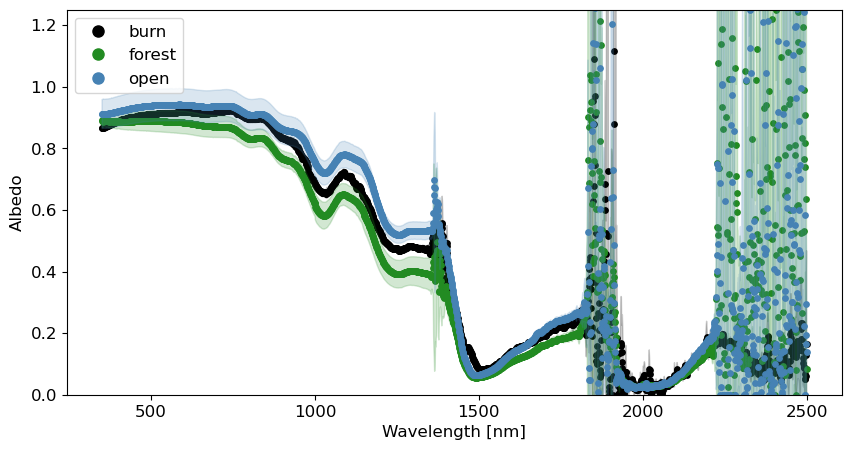

In [49]:
# Creating a dataset for now just looking at CARI during mid season
df_alb_cari = df_alb[(df_alb['site'] == 'CARI') & (df_alb['season'] == 'mid')]

# Here, we are grouping by wavelength and landcover, and taking the mean and standard deviation for each group
df_alb_group = df_alb_cari[['wavelength','value','landcover']].groupby(['wavelength','landcover']).agg(['mean','std']).reset_index()

# And plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), sharex=True, sharey=True)
plt.rcParams.update({'font.size': 12})

landcovers = ['burn','forest','open']
colors = ['black', 'forestgreen', 'steelblue']
legend_handles = []

for i in range(len(landcovers)):
    df_group_lc = df_alb_group[df_alb_group['landcover'] == landcovers[i]]
    c = colors[i]
    ax.scatter(df_group_lc['wavelength'], df_group_lc['value']['mean'], c=c, s=15, alpha=1.0)
    ax.fill_between(df_group_lc['wavelength'], df_group_lc['value']['mean']-df_group_lc['value']['std'],
                    df_group_lc['value']['mean']+df_group_lc['value']['std'], alpha=0.2, color=c)

    # Create custom legend handle for scatter points
    legend_handles.append(mlines.Line2D([], [], color=c, marker='o', linestyle='None', markersize=8, label=landcovers[i]))


ax.set_ylim(0,1.25)
ax.legend(handles=legend_handles)
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Albedo')
plt.show()

# Broadband Albedo
Broadband albedo (BBA) is the ratio of upward and downward bi-hemispherical reflectance over a specific wavelength range. To calculate BBA, we weight the albedo at each band by the amount of incoming solar radiation (called irradiance) at that band and sum all results over the wavelength range. While albedo is calculated individually over each measurement band, calculations of BBA produce a single value of albedo over a given spectral range. Some common spectral ranges are shortwave BBA (0.25 μm to 5.0 μm), ultraviolet BBA (0.4 μm to 0.7 μm), and visible BBA (0.4 μm to 0.7 μm). Broadband albedo is important for calculating impurities in snowpack, especially ones that absorb light at all short wavelengths such as black carbon.



In [50]:
# Remove tags with bad and only include albedo and upward radiation
df_bba = df[(df['type'] == 'albedo') | (df['orientation'] == 'up')]
df_bba = df_bba[(df_bba['tags'].isna() | ~df_bba['tags'].str.contains('bad', na=False))]

df_bba


,id,date,instrument,site,transect,type,attachment,orientation,lat,long,...,depth_acc,elevation,slope,aspect,tags,rcr_group,wavelength,value,landcover,season
2280366,20230407_S2_CARI_T2_3,2023-04-07,S2,CARI,T2,albedo,rcr,NaN,65.157432,-147.501666,...,0.260000,258.314789,10.524395,129.196701,NaN,3.0,350,0.809766,forest,early
2280367,20230407_S2_CARI_T2_3,2023-04-07,S2,CARI,T2,albedo,rcr,NaN,65.157432,-147.501666,...,0.260000,258.314789,10.524395,129.196701,NaN,3.0,350,0.809766,forest,early
2280368,20230407_S2_CARI_T2_3,2023-04-07,S2,CARI,T2,albedo,rcr,NaN,65.157432,-147.501666,...,0.260000,258.314789,10.524395,129.196701,NaN,3.0,351,0.810376,forest,early
2280369,20230407_S2_CARI_T2_3,2023-04-07,S2,CARI,T2,albedo,rcr,NaN,65.157432,-147.501666,...,0.260000,258.314789,10.524395,129.196701,NaN,3.0,351,0.810376,forest,early
2280370,20230407_S2_CARI_T2_3,2023-04-07,S2,CARI,T2,albedo,rcr,NaN,65.157432,-147.501666,...,0.260000,258.314789,10.524395,129.196701,NaN,3.0,352,0.811106,forest,early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564508,20230504_S4_CARI_T3_65,2023-05-04,S4,CARI,T3,albedo_raw,rcr,up,65.154253,-147.482509,...,0.332216,222.124023,3.128354,245.645065,#location estimated,13.0,2496,0.111864,open,late
3564509,20230504_S4_CARI_T3_65,2023-05-04,S4,CARI,T3,albedo_raw,rcr,up,65.154253,-147.482509,...,0.332216,222.124023,3.128354,245.645065,#location estimated,13.0,2497,0.160377,open,late
3564510,20230504_S4_CARI_T3_65,2023-05-04,S4,CARI,T3,albedo_raw,rcr,up,65.154253,-147.482509,...,0.332216,222.124023,3.128354,245.645065,#location estimated,13.0,2498,0.265144,open,late
3564511,20230504_S4_CARI_T3_65,2023-05-04,S4,CARI,T3,albedo_raw,rcr,up,65.154253,-147.482509,...,0.332216,222.124023,3.128354,245.645065,#location estimated,13.0,2499,0.380519,open,late


To be brief in this document, we will show the irradiance and broadband albedo for one paired measurement (taken about the same time)

In [51]:
df_pair = df_bba[(df_bba['date'] == '2023-04-20') & (df_bba['rcr_group'] == 6) & (df_bba['instrument'] == 'S1') ]

Plotting this, we can see that the signal is a bit messy in the longer wavelengths due to clouds and atmosphere.

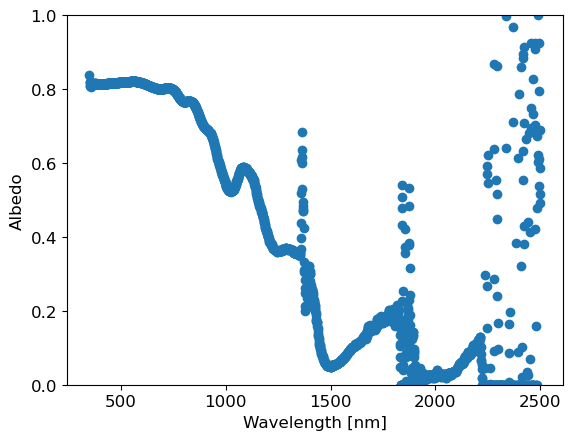

In [52]:

# Get the data and save to a simpler dataframe
df_bba_example_albedo = df_pair[df_pair['type'] == 'albedo']
df_bba_example_up = df_pair[df_pair['orientation'] == 'up']
df_test = pd.DataFrame(data=df_bba_example_albedo.wavelength.values, columns=['wavelength'])
df_test['albedo'] = df_bba_example_albedo.value.values
df_test['irrad'] = df_bba_example_up.value.values

# Plot albedo
plt.scatter(df_test.wavelength, df_test.albedo)

plt.ylim(0,1)
plt.ylabel('Albedo')
plt.xlabel('Wavelength [nm]')
plt.show()

And so we must remove these bands before integrating for BBA.

In [53]:
# In this code we are removing noise from these windows of bands
df_test = df_test[~df_test.iloc[:, 0].between(300, 400, inclusive='neither')]
df_test = df_test[~df_test.iloc[:, 0].between(1300, 1450, inclusive='neither')]
df_test = df_test[~df_test.iloc[:, 0].between(1750, 2000, inclusive='neither')]
df_test = df_test[~df_test.iloc[:, 0].between(2200, 2600, inclusive='neither')]



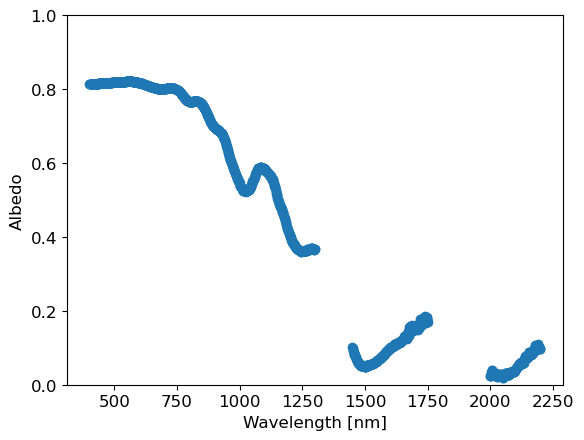

In [54]:
# Now plotting again to show the difference,
# Plot albedo
plt.scatter(df_test.wavelength, df_test.albedo)
plt.ylim(0,1)
plt.ylabel('Albedo')
plt.xlabel('Wavelength [nm]')
plt.show()

Finally, we can use numerical integration for all of the valid bands to solve for BBA 

In [55]:
# Integrating broadband albedo
broadband = np.trapz(df_test.albedo * df_test.irrad, dx=1) / np.trapz(df_test.irrad, dx=1)

print(f'BBA: {round(broadband,3)}')

BBA: 0.725
